In [4]:
from google.colab import files
uploaded = files.upload()




Saving BIKE DETAILS.csv to BIKE DETAILS (2).csv


In [5]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')
csv_path = "BIKE DETAILS.csv"
df = pd.read_csv(csv_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
print(" Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

 Dataset loaded successfully!
Shape of dataset: (1061, 7)

First 5 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [10]:
# Q1: Show first 10 rows, shape, and columns
# Q1: Show first 10 rows, shape, and columns
print("Shape:", df.shape)
print("\nColumns:\n", list(df.columns))
print("\nFirst 10 rows:")
display(df.head(10))


Shape: (1061, 7)

Columns:
 ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [11]:
# Q2: Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
missing_table = pd.concat([missing, missing_percent], axis=1)
missing_table.columns = ['missing_count', 'missing_percent']
display(missing_table)



,missing_count,missing_percent
ex_showroom_price,435,41.0
selling_price,0,0.0
name,0,0.0
year,0,0.0
seller_type,0,0.0
owner,0,0.0
km_driven,0,0.0


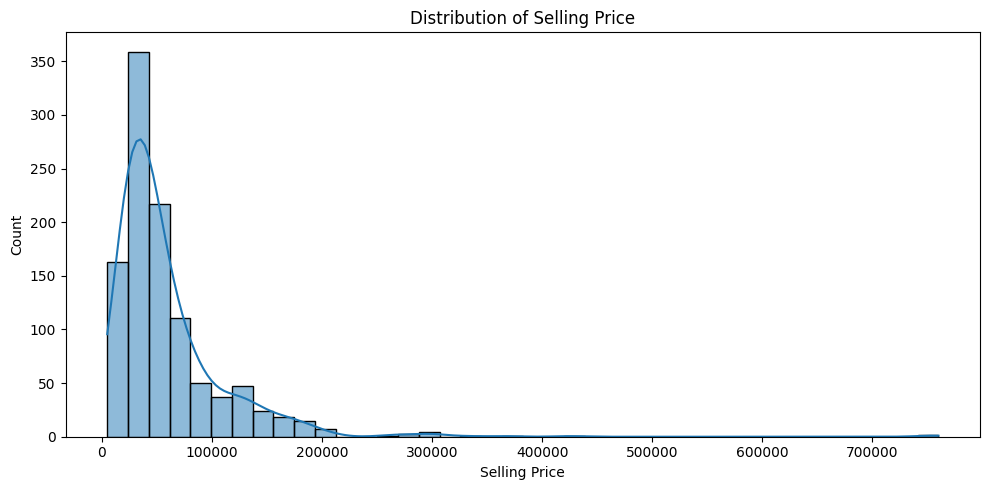

In [12]:
# Q3: Distribution of selling_price
plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'].dropna(), bins=40, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


,selling_price
seller_type,
Individual,59711.923223
Dealer,46666.666667


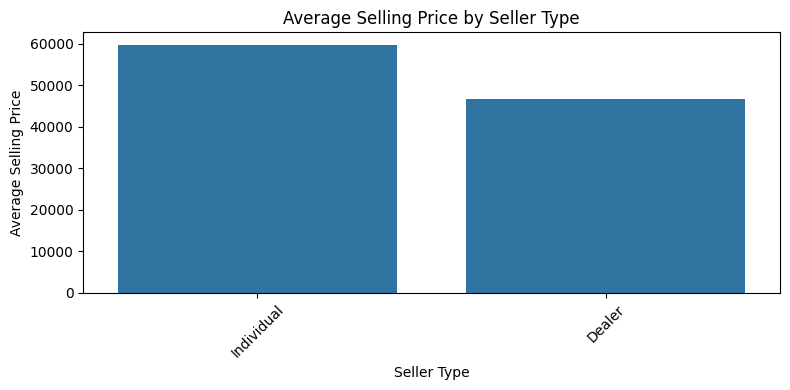

In [13]:
# Q4: Average selling price by seller_type
avg_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
display(avg_by_seller)

plt.figure(figsize=(8,4))
sns.barplot(x=avg_by_seller.index, y=avg_by_seller.values)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,km_driven
owner,
1st owner,32816.583333
3rd owner,33292.181818
2nd owner,39288.991870
4th owner,311500.000000


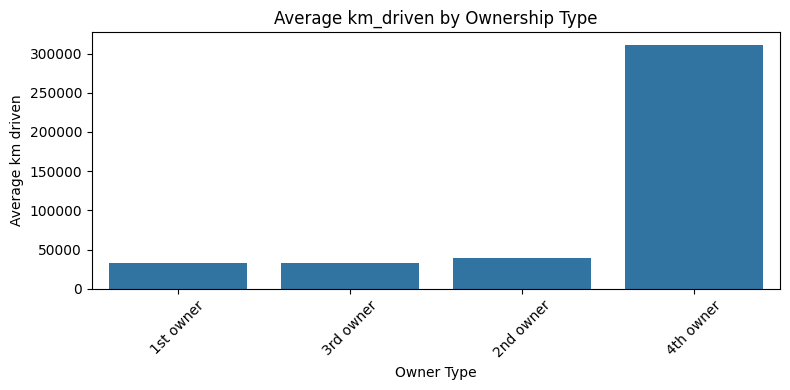

In [14]:
# Q5: Average km_driven by owner type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()
display(avg_km_by_owner)

plt.figure(figsize=(8,4))
sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values)
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Owner Type')
plt.ylabel('Average km driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Q6: IQR outlier removal on km_driven
km = df['km_driven'].dropna()
before_summary = km.describe()
Q1 = km.quantile(0.25)
Q3 = km.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <=
                                                        upper_bound)]

after_summary = df_no_outliers['km_driven'].describe()

print("Before IQR filtering (km_driven):\n", before_summary)
print("\nIQR bounds: lower =", lower_bound, ", upper =", upper_bound)
print("\nAfter IQR filtering (km_driven):\n", after_summary)
print("\nRows before:", len(df), "Rows after:", len(df_no_outliers))


Before IQR filtering (km_driven):
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

IQR bounds: lower = -30750.0 , upper = 87250.0

After IQR filtering (km_driven):
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061 Rows after: 1022


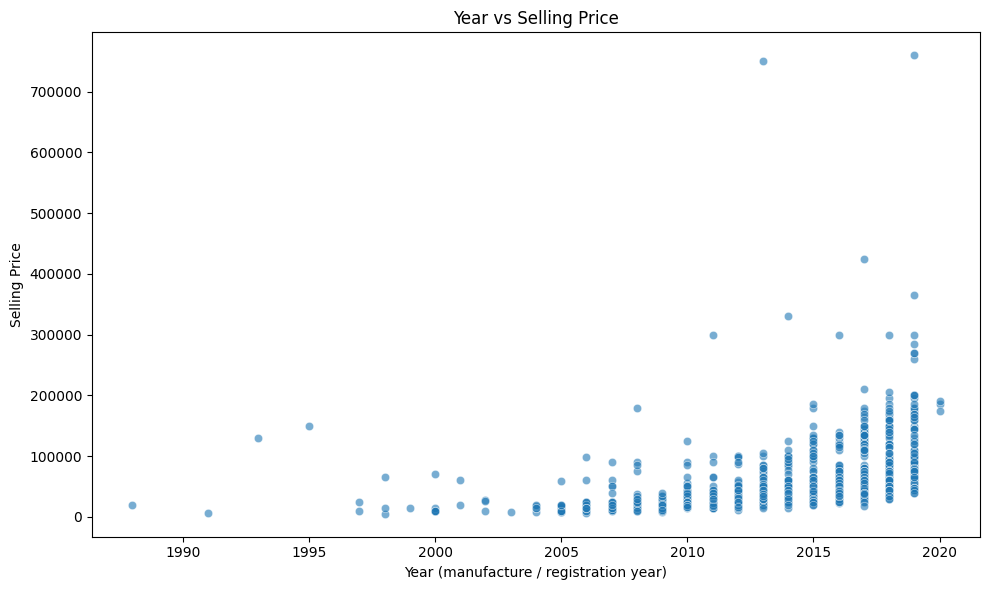

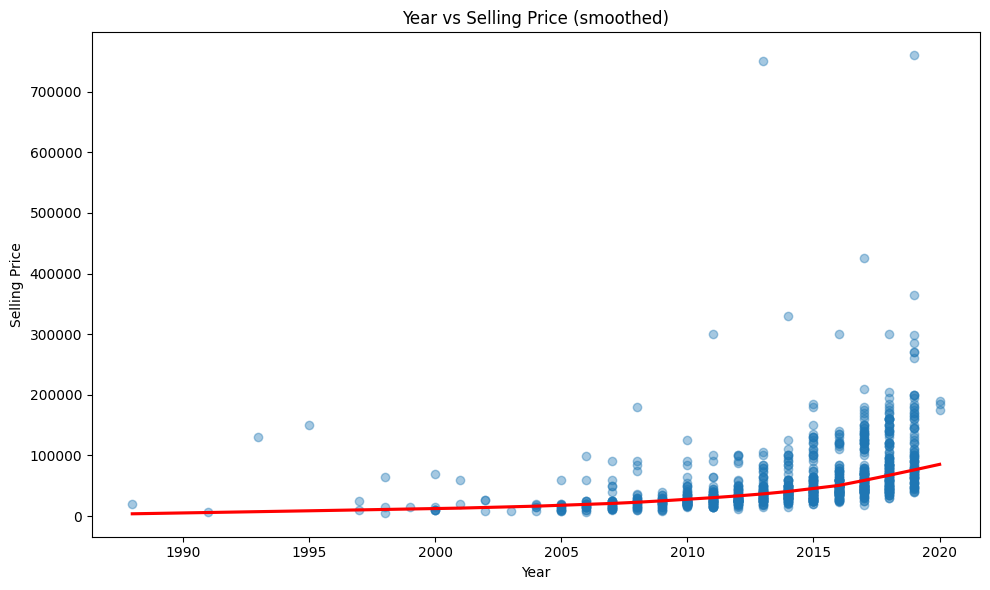

In [16]:
# Q7: Scatter plot year vs selling_price
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)
plt.title('Year vs Selling Price')
plt.xlabel('Year (manufacture / registration year)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))
sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'alpha':0.4},
            lowess=True, line_kws={'color':'red'})
plt.title('Year vs Selling Price (smoothed)')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


In [17]:
# Q8: One-hot encoding seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller',
                            drop_first=False)
display(df_encoded.head(5))


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


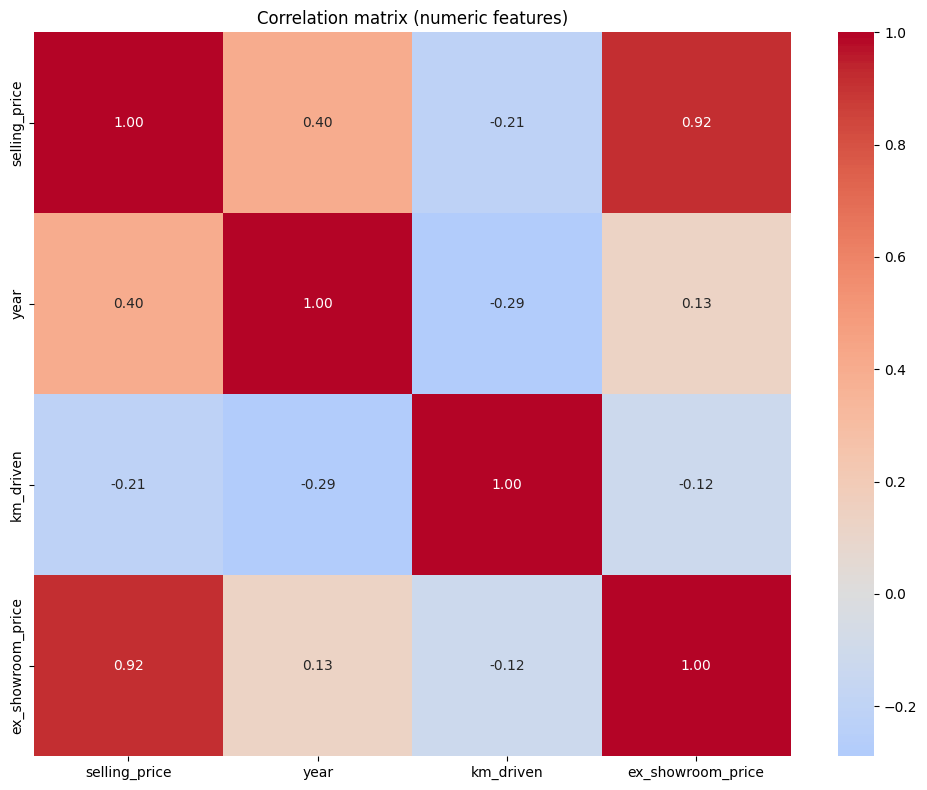

,var1,var2,corr,abs_corr
3,selling_price,ex_showroom_price,0.918583,0.918583
4,year,selling_price,0.402188,0.402188
9,km_driven,year,-0.288675,0.288675
2,selling_price,km_driven,-0.212937,0.212937
7,year,ex_showroom_price,0.126378,0.126378
11,km_driven,ex_showroom_price,-0.122011,0.122011


In [19]:
# Q9: Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number]).copy()
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()
plt.show()
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['var1','var2','corr']
corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]
corr_pairs['abs_corr'] = corr_pairs['corr'].abs()
top_corrs = corr_pairs.sort_values('abs_corr', ascending=False).drop_duplicates
 (subset=['abs_corr']).head(10)
display(top_corrs)